In [ ]:
import itertools
import sys
import re

In [ ]:
def isheader(line):
    return line[0] == '>'


In [112]:
def aspairs(f):
    seq_id = ''
    sequence = ''
    for header,group in itertools.groupby(f, isheader):
        if header:
            line = next(group)
            seq_id = line[1:].split()[0]
        else:
            sequence = ''.join(line.strip() for line in group)
            yield seq_id, sequence

if len(sys.argv) <= 1:
    print("expecting on cmdline argument: fasta_parser.py FILE.fasta")
    exit()


In [113]:
#BF1.fas = sys.argv[1]
filename="BF1.fas"
with open(filename,"r") as f:
    pairs = aspairs(f)
    seqs  = dict(pairs)
#print(seqs)
# assume that these are aligned so all the same length
# so use the length of 1st one to determine len
first = ""

for name in seqs:
    first = name
    break
print(first)
#total_length = len(seqs[first])
print ('total len is ',total_length)
for name in seqs:
    print(name, 'is',len(seqs[name]),'long')
#    print(seqs[name])
    

D05_B1_BF1
total len is  4586
D05_B1_BF1 is 4586 long
E05_B2_BF1 is 4586 long
F05_B3_BF1 is 4586 long
G05_B4_BF1 is 4586 long
H05_B5_BF1 is 4586 long
A06_B6_BF1 is 4586 long
B06_B7_BF1 is 4586 long
C06_B8_BF1 is 4586 long
D06_B9_BF1 is 4586 long
E06_B10_BF is 4586 long
F06_B11_BF is 4586 long
G06_B12_BF is 4586 long
H06_B13_BF is 4586 long
D07_B17_BF is 4586 long
E07_B18_BF is 4586 long
F07_B19_BF is 4586 long
G07_B20_BF is 4586 long
H07_B21_BF is 4586 long
A08_B22_BF is 4586 long
B08_B23_BF is 4586 long
C08_B24_BF is 4586 long
D08_B25_BF is 4586 long
E08_B26_BF is 4586 long
F08_B27_BF is 4586 long
G08_B28_BF is 4586 long
H08_B29_BF is 4586 long
A09_B30_BF is 4586 long
B09_B31_BF is 4586 long
C09_B32_BF is 4586 long
D09_B33_BF is 4586 long
E09_B34_BF is 4586 long
F09_B35_BF is 4586 long
JX192620.1 is 4586 long


In [114]:
for i in range(total_length):
    col = set()
    column_text = ""
    for name in seqs:
        base = seqs[name][i]
        if base == "N" or base == "-":
            continue # skip the 'N' bases or '-'
        # could change this to calculate frequence
        # by using a dictionary instead of a set here
        col.add(base)
        column_text += base
    print(f'colummn # {i} is {col}')
    print(column_text)

colummn # 0 is {'C'}
C
colummn # 1 is {'A'}
A
colummn # 2 is {'C'}
C
colummn # 3 is {'G'}
G
colummn # 4 is {'C'}
C
colummn # 5 is {'A'}
A
colummn # 6 is {'C'}
C
colummn # 7 is {'G'}
G
colummn # 8 is {'C'}
C
colummn # 9 is {'A', 'T'}
TTA
colummn # 10 is {'G', 'C', 'T'}
TTTTTGTC
colummn # 11 is {'A', 'G', 'T'}
GTGTGGGA
colummn # 12 is {'G', 'C'}
GGGGC
colummn # 13 is {'A'}
A
colummn # 14 is {'C'}
C
colummn # 15 is {'A'}
A
colummn # 16 is {'C', 'T'}
TTTC
colummn # 17 is {'A', 'T'}
TTTTTTTTTTTTA
colummn # 18 is {'C', 'T'}
TTTTTTTTTTC
colummn # 19 is {'A', 'G'}
GGGGGA
colummn # 20 is {'C', 'T'}
TTTTTTC
colummn # 21 is {'A', 'C'}
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCA
colummn # 22 is {'C', 'T'}
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTC
colummn # 23 is {'A', 'T'}
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTA
colummn # 24 is {'C'}
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
colummn # 25 is {'A'}
AAAAAAAAAAAAAAAAAAAAAAAAAAAA
colummn # 26 is {'C', 'T'}
TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTC
colummn # 27 is {'A', 'G'}
GGGGGGGGGGGGGGGGGG

In [ ]:
filename = "BF1.fas"
with open(filename, "r") as f:
    pairs = aspairs(f)
    seqs = dict(pairs)

# Assuming sequences are aligned and have the same length
first_seq = next(iter(seqs.values()))

for i in range(len(first_seq)):
    bases_at_position = set(seq[i] for seq in seqs.values() if seq[i] not in {"N", "-"})
    
    if len(bases_at_position) > 1:
        print(f"Position {i+1} has differences:")
        for name, base in seqs.items():
            print(f"{name}: {base[i]}", end=" ")
        print("\n")



In [115]:
filename = "BF1.fas"
with open(filename, "r") as f:
    pairs = aspairs(f)
    seqs = dict(pairs)

# Assuming sequences are aligned and have the same length
first_seq = next(iter(seqs.values()))
total_positions = len(first_seq)

# Dictionary to store the frequency of differences at each position
difference_freq = {}

for i in range(total_positions):
    bases_at_position = [seq[i] for seq in seqs.values() if seq[i] not in {"N", "-"}]

    if len(set(bases_at_position)) > 1:
        differences = " ".join(bases_at_position)
        if differences not in difference_freq:
            difference_freq[differences] = 1
        else:
            difference_freq[differences] += 1

# Display the frequency of differences at each position
print("Frequency of differences at each position:")
for differences, freq in difference_freq.items():
    print(f"Position {differences}: {freq} times")

# Display the top 10 positions with the highest frequency of differences
top_10 = sorted(difference_freq.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 positions with the highest frequency of differences:")
for differences, freq in top_10:
    print(f"Position {differences}: {freq} times")



Frequency of differences at each position:
Position T T A: 2 times
Position T T T T T G T C: 1 times
Position G T G T G G G A: 1 times
Position G G G G C: 1 times
Position T T T C: 2 times
Position T T T T T T T T T T T T A: 1 times
Position T T T T T T T T T T C: 1 times
Position G G G G G A: 1 times
Position T T T T T T C: 1 times
Position C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C A: 74 times
Position T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T C: 50 times
Position T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T T A: 52 times
Position G G G G G G G G G G G G G G G G G G G G G G G G G G G G G G G G A: 62 times
Position G G G G G G G G G G G G G G G G G G G G G G G G G G G G G G G G C: 52 times
Position A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A C: 57 times
Position A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A T: 54 times
Position C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C

In [ ]:
filename = "BF1.fas"
with open(filename, "r") as f:
    pairs = aspairs(f)
    seqs = dict(pairs)

# Assuming sequences are aligned and have the same length
first_seq = next(iter(seqs.values()))
total_positions = len(first_seq)

# Dictionary to store the frequency of differences at each position
difference_freq = {}

for i in range(total_positions):
    bases_at_position = [seq[i] for seq in seqs.values() if seq[i] not in {"N", "-"}]

    if len(set(bases_at_position)) > 1:
        differences = " ".join(bases_at_position)
        if differences not in difference_freq:
            difference_freq[differences] = 1
        else:
            difference_freq[differences] += 1

# Display the top 10 positions with the highest frequency of differences
top_10 = sorted(difference_freq.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 positions with the highest frequency of differences:")
for differences, freq in top_10:
    print(f"Position {differences}: {freq} times")



In [91]:
filename = "BF1.fas"
with open(filename, "r") as f:
    pairs = aspairs(f)
    seqs = dict(pairs)

# Assuming sequences are aligned and have the same length
first_seq = next(iter(seqs.values()))
total_positions = len(first_seq)

# Dictionary to store the total number of differences for each strain
strain_total_difference = {}

for name, sequence in seqs.items():
    differences_count = sum(1 for i in range(total_positions) if sequence[i] not in {"N", "-"})
    strain_total_difference[name] = differences_count

# Rank strains based on the total number of differences
ranked_strains = sorted(strain_total_difference.items(), key=lambda x: x[1], reverse=True)
print("\nRanking of strains based on the total number of differences across all positions:")
for rank, (name, differences_count) in enumerate(ranked_strains, 1):
    print(f"{rank}. {name}: {differences_count} differences")



Ranking of strains based on the total number of differences across all positions:
1. JX192620.1: 4586 differences
2. F09_B35_BF: 1028 differences
3. A09_B30_BF: 1017 differences
4. C09_B32_BF: 1017 differences
5. A08_B22_BF: 1015 differences
6. C08_B24_BF: 1010 differences
7. B09_B31_BF: 1008 differences
8. B08_B23_BF: 1006 differences
9. F07_B19_BF: 1005 differences
10. E07_B18_BF: 1000 differences
11. D09_B33_BF: 1000 differences
12. F05_B3_BF1: 997 differences
13. G06_B12_BF: 997 differences
14. E09_B34_BF: 997 differences
15. E08_B26_BF: 996 differences
16. H07_B21_BF: 995 differences
17. F08_B27_BF: 994 differences
18. G08_B28_BF: 991 differences
19. B06_B7_BF1: 988 differences
20. E06_B10_BF: 986 differences
21. C06_B8_BF1: 982 differences
22. D07_B17_BF: 981 differences
23. D06_B9_BF1: 972 differences
24. H06_B13_BF: 967 differences
25. D08_B25_BF: 953 differences
26. E05_B2_BF1: 951 differences
27. H05_B5_BF1: 949 differences
28. A06_B6_BF1: 948 differences
29. H08_B29_BF: 944

In [90]:
# Count and print the number of strains
num_strains = len(seqs)
print(f'Total number of strains: {num_strains}')


Total number of strains: 33


In [111]:
def calculate_sequence_percentage_difference(seq1, seq2):
    """
    Calculate the total sequence percentage difference between two DNA sequences.

    Parameters:
    - seq1: First DNA sequence (string)
    - seq2: Second DNA sequence (string)

    Returns:
    - percentage_difference: Total percentage difference between the sequences (float)
    """
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must have the same length for comparison.")

    differences = sum(1 for base1, base2 in zip(seq1, seq2) if base1 != base2 and base1 not in {"N", "-"} and base2 not in {"N", "-"})
    total_positions = len(seq1)

    percentage_difference = (differences / total_positions) * 100.0
    return percentage_difference


filename = "BF1.fas"

with open(filename, "r") as f:
    pairs = aspairs(f)
    seqs = dict(pairs)

# Assuming sequences are aligned and have the same length
first_seq = next(iter(seqs.values()))
total_positions = len(first_seq)

# Dictionary to store the total percentage difference for each strain
strain_total_percentage_difference = {}

for name, sequence in seqs.items():
    percentage_difference = calculate_sequence_percentage_difference(first_seq, sequence)
    strain_total_percentage_difference[name] = percentage_difference

# Rank strains based on the total percentage difference
ranked_strains = sorted(strain_total_percentage_difference.items(), key=lambda x: x[1], reverse=True)
print("\nRanking of strains based on the total percentage difference across all positions:")
for rank, (name, percentage_difference) in enumerate(ranked_strains, 1):
    print(f"{rank}. {name}: {percentage_difference:.2f}% difference")





Ranking of strains based on the total percentage difference across all positions:
1. JX192620.1: 15.20% difference
2. A09_B30_BF: 0.85% difference
3. F09_B35_BF: 0.81% difference
4. F08_B27_BF: 0.76% difference
5. C08_B24_BF: 0.74% difference
6. E07_B18_BF: 0.70% difference
7. G08_B28_BF: 0.70% difference
8. G06_B12_BF: 0.68% difference
9. A08_B22_BF: 0.68% difference
10. B08_B23_BF: 0.68% difference
11. E06_B10_BF: 0.65% difference
12. E08_B26_BF: 0.65% difference
13. C09_B32_BF: 0.65% difference
14. B06_B7_BF1: 0.61% difference
15. B09_B31_BF: 0.59% difference
16. D09_B33_BF: 0.59% difference
17. F05_B3_BF1: 0.57% difference
18. F07_B19_BF: 0.57% difference
19. H07_B21_BF: 0.57% difference
20. C06_B8_BF1: 0.55% difference
21. H06_B13_BF: 0.55% difference
22. E09_B34_BF: 0.55% difference
23. H05_B5_BF1: 0.52% difference
24. G07_B20_BF: 0.46% difference
25. D08_B25_BF: 0.46% difference
26. E05_B2_BF1: 0.44% difference
27. D07_B17_BF: 0.44% difference
28. D06_B9_BF1: 0.39% difference
2

Correlation between Score and Category: -0.11485009189171015


IndexError: index 0 is out of bounds for axis 0 with size 0

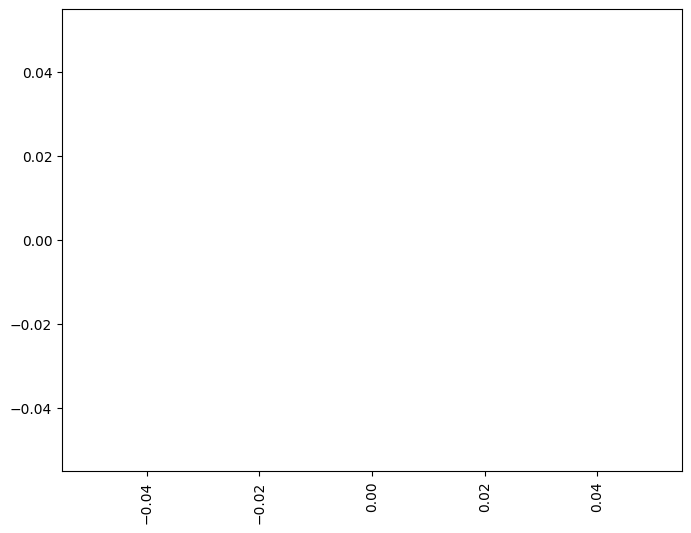